**Introduction-**
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Objective:**
Build a model that will help them identify the potential customers who have higher probability of purchasing the loan.
This will increase the success ratio while at the same time reduce the cost of the campaign.

### Data Source
Bank_Personal_Loan_Modelling-1.xlsx

# Q1. Read the column description and ensure you understand each attribute well.

### Data Dictionary
Data Fields-
1. ID - Customer ID (Unique ID)
2. Age - Customer's age in completed years (Continous data)
3. Experience - #years of professional experience (Continous data)
4. Income - Annual income of the customer (000) (Continous data)
5. ZIPCode - Home Address ZIP code (Continous data)
6. Family - Family size of the customer (Continous data)
7. CCAvg - Avg. spending on credit cards per month (000) (Continous data)
8. Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional (Categorical data)
9. Mortgage - Value of house mortgage if any. (000) (Continous data)
10. **Personal Loan** - Did this customer accept the personal loan offered in the last campaign? (Categorical data)- This is our **Target Variable**
11. Securities Account - Does the customer have a securities account with the bank? (Categorical data)
12. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical data)
13. Online - Does the customer use internet banking facilities? (Categorical data)
14. CreditCard - Does the customer use a credit card issued by UniversalBank? (Categorical data)

From the above Data Dictionary we observe that there are 14 liability customer variables listed in the dataset.

Y = Personal Loan will be our Dependent/Target variable

X = Remaining features will be considered as Independent variables (Note- ID, ZIPCode will be taken care of during the exercise)

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

### Data Ingestion

In [6]:
bank_df = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx', sheet_name='Data')
df = bank_df.copy(deep=True)

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)

In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
# Check for missing values
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# Q2. Study the data distribution in each attribute, share your findings.


In [72]:
# Summary statistics of numeric data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.0,45.338400,11.463166,23.0,35.000000,45.000000,55.000000,67.000000
Experience,5000.0,20.119600,11.440484,0.0,10.000000,20.000000,30.000000,43.000000
Income,5000.0,73.607800,45.602411,8.0,39.000000,64.000000,98.000000,186.000000
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.0,2.396400,1.147663,1.0,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.0,1.831313,1.452223,0.0,0.700000,1.500000,2.500000,5.200000
Education,5000.0,1.881000,0.839869,1.0,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.0,50.465600,82.934620,0.0,0.000000,0.000000,101.000000,252.000000
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.000000,0.000000,0.000000,1.000000


Observations-
1. ID, Zip Code fields needs to be removed from thee dataset as these not irrelevant for this excercise 
2. Experience fields has some negative values which needs to be imputed
3. No missing value observed in the dataset
4. Based on Max value of Income, Mortgage and CCAvg - Suspect Outliers which will be investigated during the excercise

# Studying Data Distribution of every attribute using a BoxPlot to review distribution and Outliers in the dataset 

## Q3. Get the target column distribution. Your comments.

### As part of studying each attribute, we will look at the data individually as well as against the target variable distribution
1. BoxPlots for each attribute and against target column
2. T-Test to validate hypothesis
3. Handling outliers basis data distribution (if any)
4. Understanding Categorical data i.e., Family size, Education categories, Securities (y/n), Online (y/n), CD (y/n) to determine  historical relative frequency (Probabilty) across these variables to provide a 'Loan Response Rate'

<Axes: xlabel='Age'>

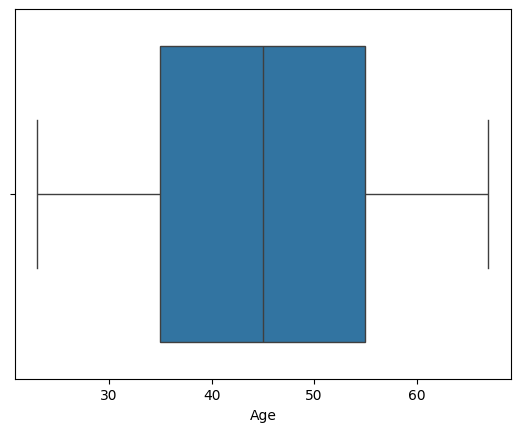

In [17]:
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Personal_Loan', ylabel='Age'>

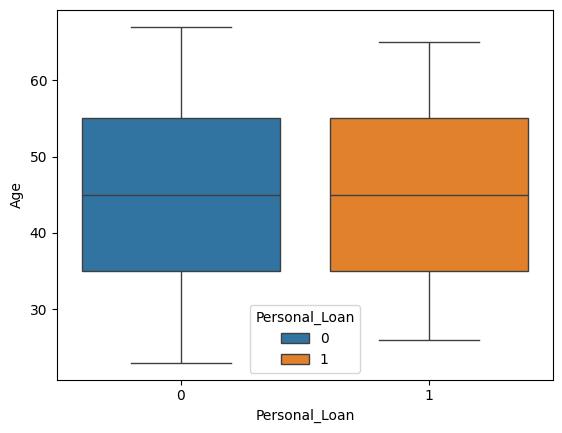

In [18]:
sns.boxplot(x='Personal_Loan', y='Age', hue='Personal_Loan', data=df)

##### Observation:
There are no outliers in 'Age' variable and customers of age ranging from 25 to 65 years had accepted the personal loan offered in the last campaign.

##### Hypothesis Test: 'Age' variable

H0 : The average age of customers taking personal loan is SAME as the average age of customers not taking personal loan.

H1 : The average age of customers taking personal loan is DIFFERENT from the average age of customers not taking personal loan.

In [19]:
from scipy import stats

stats.ttest_ind(df[df.Personal_Loan == 1]['Age'], df[df.Personal_Loan == 0]['Age'])

TtestResult(statistic=-0.5461906615539323, pvalue=0.584959263705325, df=4998.0)

##### Here p-value>0.05, so we accept null hypothesis: H0 : Age is not a significant factor for customers decision on accepting personal loan.

<Axes: xlabel='Experience'>

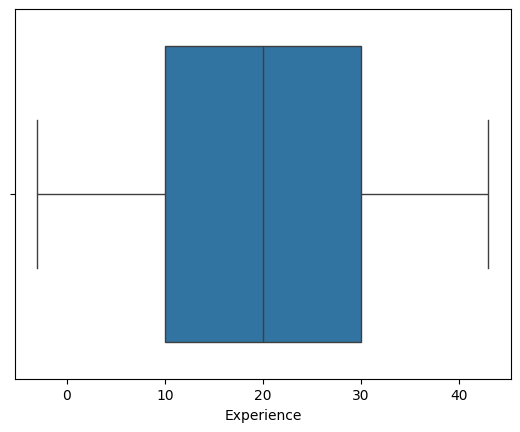

In [20]:
sns.boxplot(x='Experience', data=df)

##### Observation:
**'Experience'** variable has negative values, which need to be treated.

<Axes: xlabel='Personal_Loan', ylabel='Experience'>

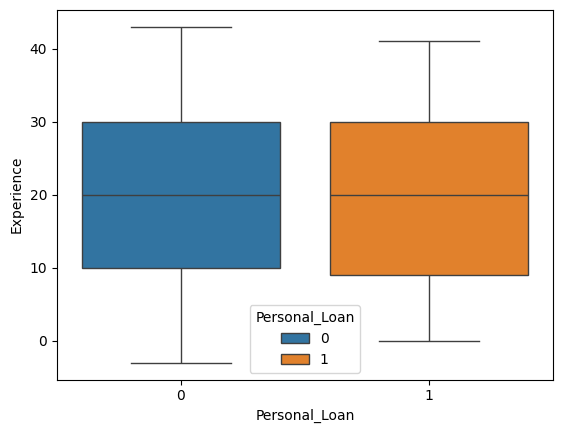

In [21]:
sns.boxplot(x='Personal_Loan', y='Experience', hue='Personal_Loan', data=df)

##### Observation:
Customers with professional experience ranging from 0 to 40 years had accepted the personal loan offered in the last campaign. 
No Outliers observed, however negative age value will be imputed later in the excercise

##### Hypothesis Test: 'Experience' variable

H0 : The average years of professional experience of customers taking personal loan is SAME as the average years of professional experience of customers not taking personal loan.

H1 : The average years of professional experience of customers taking personal loan is DIFFERENT from the average years of professional experience of customers not taking personal loan.

In [22]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Experience'], df[df.Personal_Loan == 0]['Experience'])

TtestResult(statistic=-0.5240947451995412, pvalue=0.600235883164189, df=4998.0)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average years of professional experience of customers taking personal loan is SAME as the average years of professional experience of customers not taking personal loan.

<class 'numpy.ndarray'>


<Axes: xlabel='Experience'>

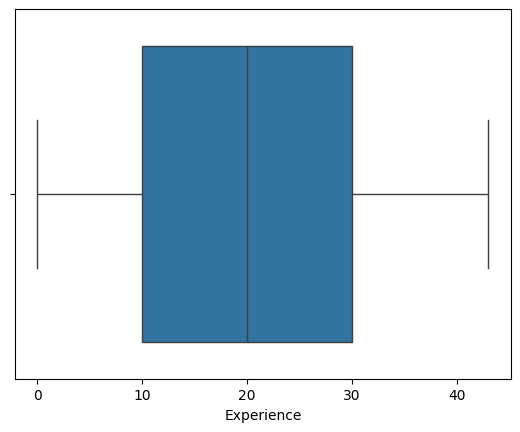

In [23]:
# Treating negative values in 'Experience' variable
exp_array = np.array(df['Experience'])
print(type(exp_array))

exp_array[exp_array < 0] = 0
df['Experience'] = pd.DataFrame(exp_array)

sns.boxplot(x='Experience', data=df)

<Axes: xlabel='Income'>

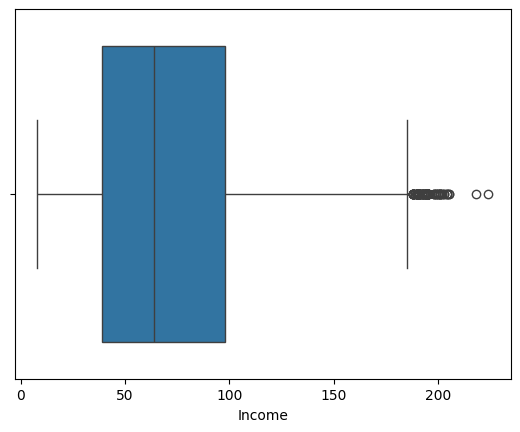

In [24]:
sns.boxplot(x='Income', data=df)

##### Observation:
There are few outliers in **'Income'** variable so it needs to be treated.

<Axes: xlabel='Personal_Loan', ylabel='Income'>

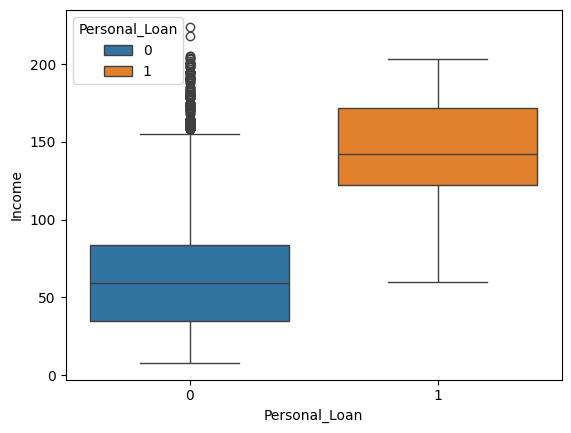

In [25]:
sns.boxplot(x='Personal_Loan', y='Income', hue='Personal_Loan', data=df)

##### Observation:
Customers with income ranging from USD 60k to 200k had accepted the personal loan offered in the last campaign. But 50% of customers who accepted personal loan had income range of USD 120k to 170k.

##### Hypothesis Test: 'Income' variable

H0 : The average income of customers taking personal loan is SAME as the average income of customers not taking personal loan.

H1 : The average income of customers taking personal loan is DIFFERENT from the average income of customers not taking personal loan.


In [26]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Income'], df[df.Personal_Loan == 0]['Income'])

TtestResult(statistic=41.08533291207552, pvalue=0.0, df=4998.0)

##### Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The average income of customers taking personal loan is DIFFERENT from the average income of customers not taking personal loan.

186.5
<class 'numpy.ndarray'>


<Axes: xlabel='Income'>

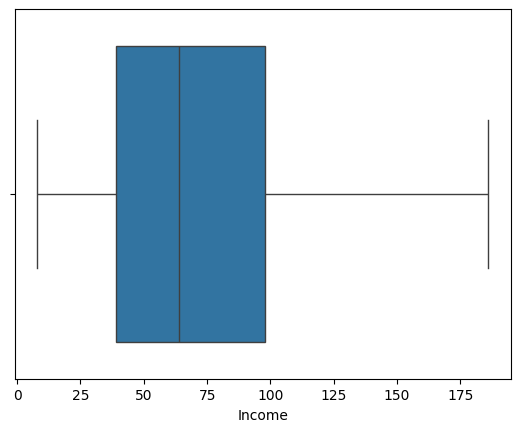

In [27]:
# Outliers treatment in 'Income' variable - Using Statistical Outlier identification Method
q75, q25 = np.percentile(df['Income'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

inc_array = np.array(df['Income'])
print(type(inc_array))

inc_array[inc_array > max_val] = max_val
df['Income'] = pd.DataFrame(inc_array)

sns.boxplot(x='Income', data=df)

<Axes: xlabel='CCAvg'>

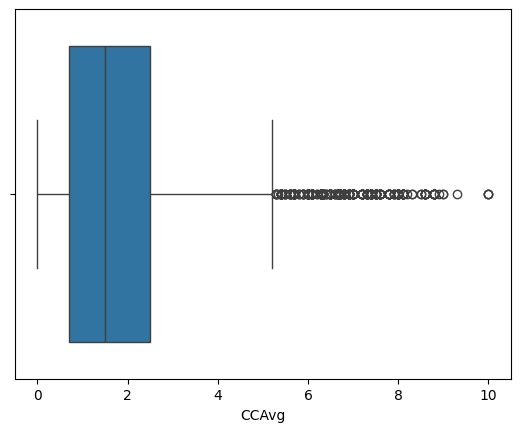

In [28]:
sns.boxplot(x='CCAvg', data=df)

##### Observation:
There are few outliers in **'CCAvg'** variable so it needs to be treated.

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

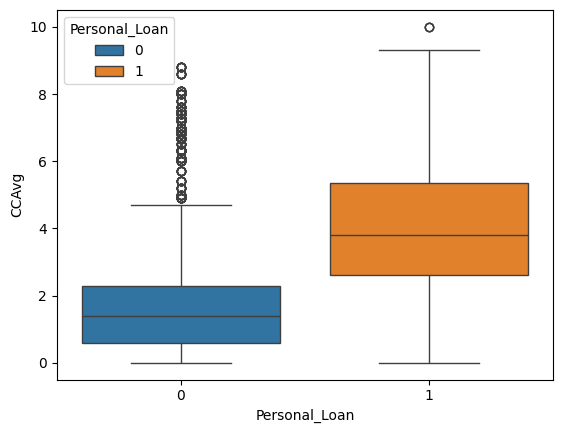

In [29]:
sns.boxplot(x='Personal_Loan', y='CCAvg', hue='Personal_Loan', data=df)

##### Observation:
Customers with average monthly credit card spend of USD 0 to 10k had accepted the personal loan offered in the last campaign.But 50% of customers who accepted personal loan had average monthly credit card spend of USD 2.5K to 5.5K.

##### Hypothesis Test: 'CCAvg' variable

H0 : The average monthly credit card spend of customers taking personal loan is SAME as the average monthly credit card spend of customers not taking personal loan.

H1 : The average monthly credit card spend of customers taking personal loan is DIFFERENT from the average monthly credit card spend of customers not taking personal loan.

In [30]:
stats.ttest_ind(df[df.Personal_Loan == 1]['CCAvg'], df[df.Personal_Loan == 0]['CCAvg'])

TtestResult(statistic=27.882284897899115, pvalue=3.815683641946184e-159, df=4998.0)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average monthly credit card spend of customers taking personal loan is SAME as the average monthly credit card spend of customers not taking personal loan.

5.2
<class 'numpy.ndarray'>


<Axes: xlabel='CCAvg'>

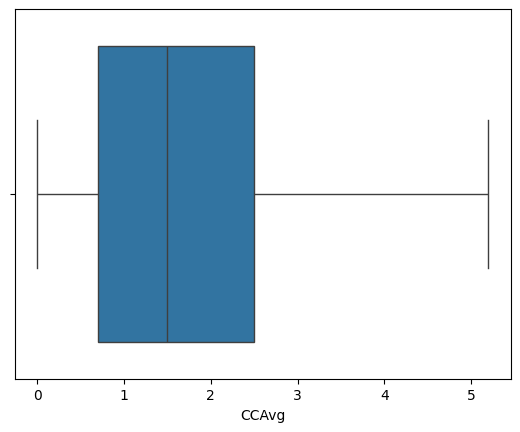

In [31]:
# Outliers treatment in 'CCAvg' variable
q75, q25 = np.percentile(df['CCAvg'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

CCAvg_array = np.array(df['CCAvg'])
print(type(CCAvg_array))

CCAvg_array[CCAvg_array > max_val] = max_val
df['CCAvg'] = pd.DataFrame(CCAvg_array)

sns.boxplot(x='CCAvg', data=df)

<Axes: xlabel='Mortgage'>

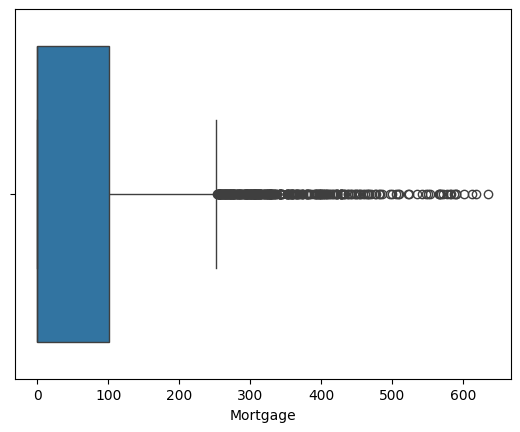

In [32]:
sns.boxplot(x='Mortgage', data=df)

##### Observation:
There are few outliers in **'Mortgage'** variable so it needs to be treated.

<Axes: xlabel='Personal_Loan', ylabel='Mortgage'>

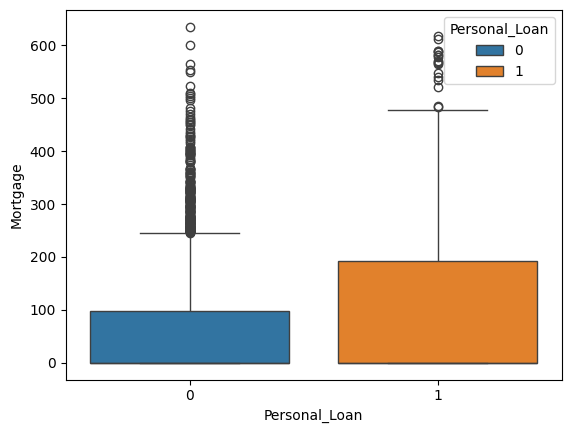

In [33]:
sns.boxplot(x='Personal_Loan', y='Mortgage', hue='Personal_Loan', data=df,)

##### Observation:
Customers with mortgage ranging from USD 0 to 650k had accepted the personal loan offered in the last campaign. 
Customers who accepted personal loan had mortgage mostly ranging from USD 0 to 200k.

##### Hypothesis Test: 'Mortgage' variable

H0 : The average mortgage of customers taking personal loan is SAME as the average mortgage of customers not taking personal loan.

H1 : The average mortgage of customers taking personal loan is DIFFERENT from the average mortgage of customers not taking personal loan.

In [34]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Mortgage'], df[df.Personal_Loan == 0]['Mortgage'])

TtestResult(statistic=10.148618914431497, pvalue=5.730341721574011e-24, df=4998.0)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average mortgage of customers taking personal loan is SAME as the average mortgage of customers not taking personal loan.

252.5
<class 'numpy.ndarray'>


<Axes: xlabel='Mortgage'>

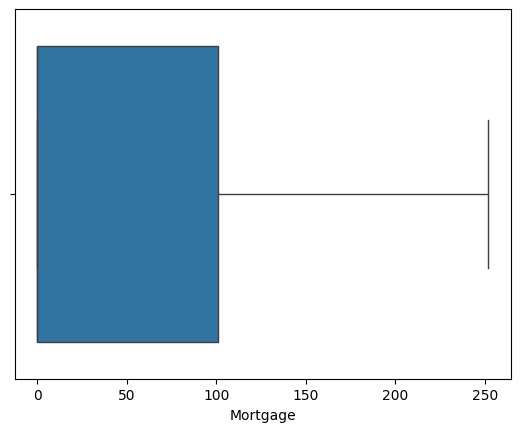

In [35]:
# Outliers treatment in 'Mortgage' variable
q75, q25 = np.percentile(df['Mortgage'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

mort_array = np.array(df['Mortgage'])
print(type(mort_array))

mort_array[mort_array > max_val] = max_val
df['Mortgage'] = pd.DataFrame(mort_array)

sns.boxplot(x='Mortgage', data=df)

<Axes: xlabel='Personal_Loan', ylabel='Mortgage'>

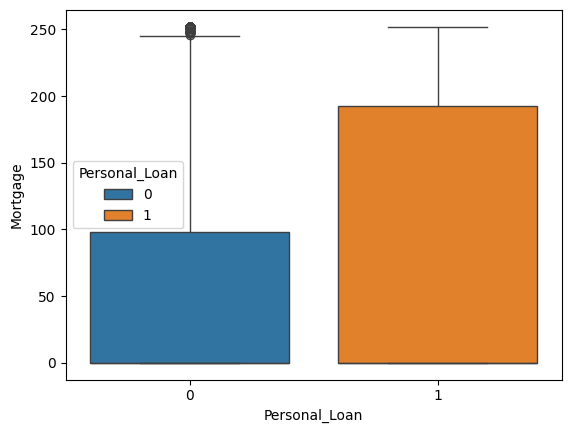

In [36]:
sns.boxplot(x='Personal_Loan', y='Mortgage', hue='Personal_Loan', data=df,)

In [37]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Mortgage'], df[df.Personal_Loan == 0]['Mortgage'])

TtestResult(statistic=6.589238611435605, pvalue=4.8762305458948737e-11, df=4998.0)

In [38]:
# Understanding categorical variables
personal_loan = np.array(df['Personal_Loan'])
family = np.array(df['Family'])
education = np.array(df['Education'])
sec_acc = np.array(df['Securities Account'])
cd_acc = np.array(df['CD Account'])
online = np.array(df['Online'])
credit_card = np.array(df['CreditCard'])

In [39]:
pd.crosstab(personal_loan, family, rownames=['Personal_Loan'], colnames=['Family size']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Family size,1,2,3,4
Personal_Loan,,,,
0,92.73,91.82,86.83,89.03
1,7.27,8.18,13.17,10.97


##### Observation: 
1. **7.27%** of customers with **Family size = 1** had accepted the personal loan offered in the previous campaign.
2. **8.18%** of customers with **Family size = 2** had accepted the personal loan offered in the previous campaign.
3. **13.17%** of customers with **Family size = 3** had accepted the personal loan offered in the previous campaign.
4. **10.97%** of customers with **Family size = 4** had accepted the personal loan offered in the previous campaign.

In [40]:
pd.crosstab(personal_loan, education, rownames=['Personal_Loan'], colnames=['Education level']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Education level,1,2,3
Personal_Loan,,,
0,95.56,87.03,86.34
1,4.44,12.97,13.66


##### Observation: 
1. **4.44%** of customers with **Education level = 1 (Undergrad)** had accepted the personal loan offered in the previous campaign.
2. **12.97%** of customers with **Education level = 2 (Graduate)** had accepted the personal loan offered in the previous campaign.
3. **13.66%** of customers with **Education level = 3 (Advanced/Professional)** had accepted the personal loan offered in the previous campaign.

In [41]:
pd.crosstab(personal_loan, sec_acc, rownames=['Personal_Loan'], colnames=['Securities Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Securities Account,0,1
Personal_Loan,,
0,90.62,88.51
1,9.38,11.49


##### Observation: 
1. **9.38%** of customers **NOT HAVING** securities account with the bank had accepted the personal loan offered in the previous campaign.
2. **11.49%** of customers **HAVING** securities account with the bank had accepted the personal loan offered in the previous campaign.

In [42]:
pd.crosstab(personal_loan, cd_acc, rownames=['Personal_Loan'], colnames=['CD Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

CD Account,0,1
Personal_Loan,,
0,92.76,53.64
1,7.24,46.36


##### Observation: 
1. **7.24%** of customers **NOT HAVING** a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.
2. **46.36%** of customers **HAVING** a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.

In [43]:
pd.crosstab(personal_loan, online, rownames=['Personal_Loan'], colnames=['Online']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Online,0,1
Personal_Loan,,
0,90.62,90.25
1,9.38,9.75


##### Observation: 
1. **9.38%** of customers **NOT doing online transactions** had accepted the personal loan offered in the previous campaign.
2. **9.75%** of customers **doing online transactions** had accepted the personal loan offered in the previous campaign.

In [44]:
pd.crosstab(personal_loan, credit_card, rownames=['Personal_Loan'], colnames=['Credit Card']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Credit Card,0,1
Personal_Loan,,
0,90.45,90.27
1,9.55,9.73


##### Observation: 
1. **9.55%** of customers **NOT using a credit card issued by UniversalBank** had accepted the personal loan offered in the previous campaign.
2. **9.73%** of customers **using a credit card issued by UniversalBank** had accepted the personal loan offered in the previous campaign.

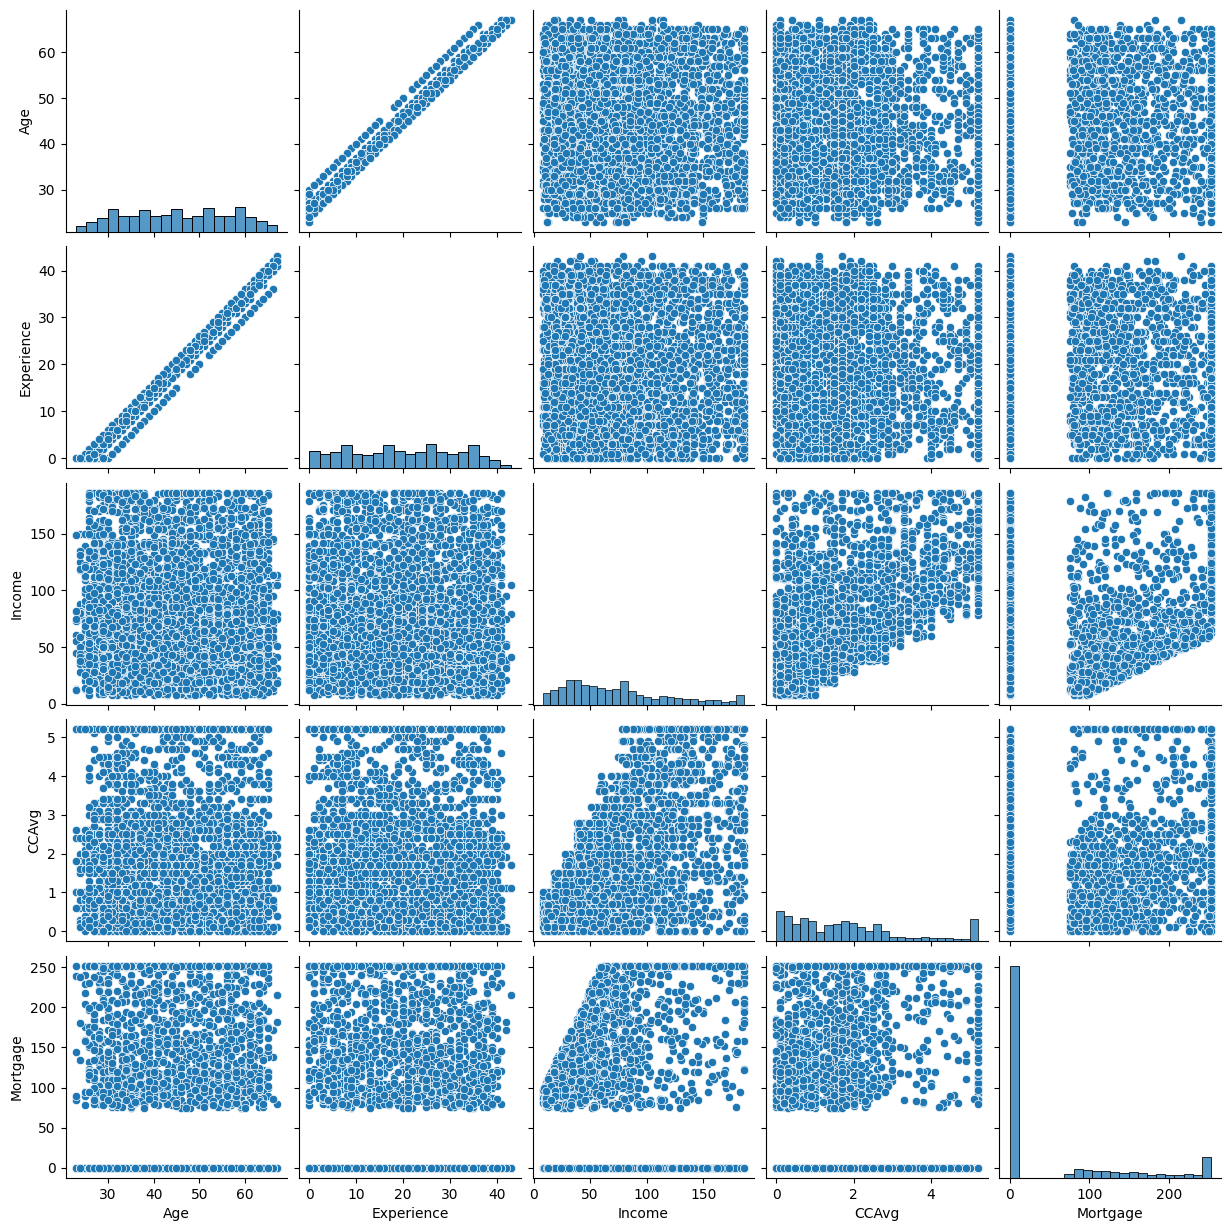

In [45]:
# Pair-plots of continuous variables
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

<Axes: xlabel='Personal_Loan', ylabel='count'>

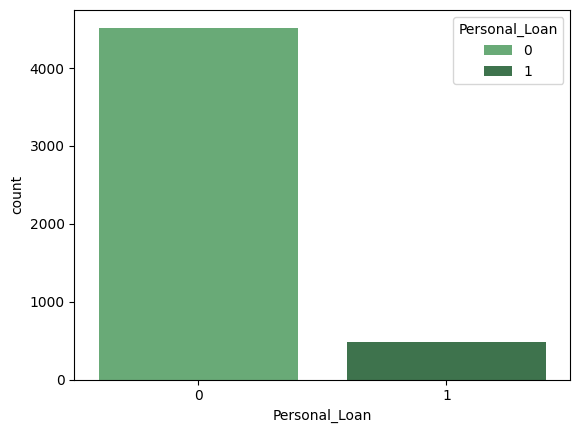

In [46]:
sns.countplot(x='Personal_Loan', data=df, palette="Greens_d", hue='Personal_Loan')

In [47]:
pd.value_counts(df['Personal_Loan'].values, sort=False)

0    4520
1     480
dtype: int64

**Only (480/5000) = 9.6% of customers accepted the personal loan offered in the last campaign.**

In [48]:
# Standardise data 
df.apply(lambda x: (x-np.mean(x))/(np.std(x)))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [49]:
Y_labels = ['0', '1']

Text(0.5, 1.0, 'Correlation between different features of dataset\n')

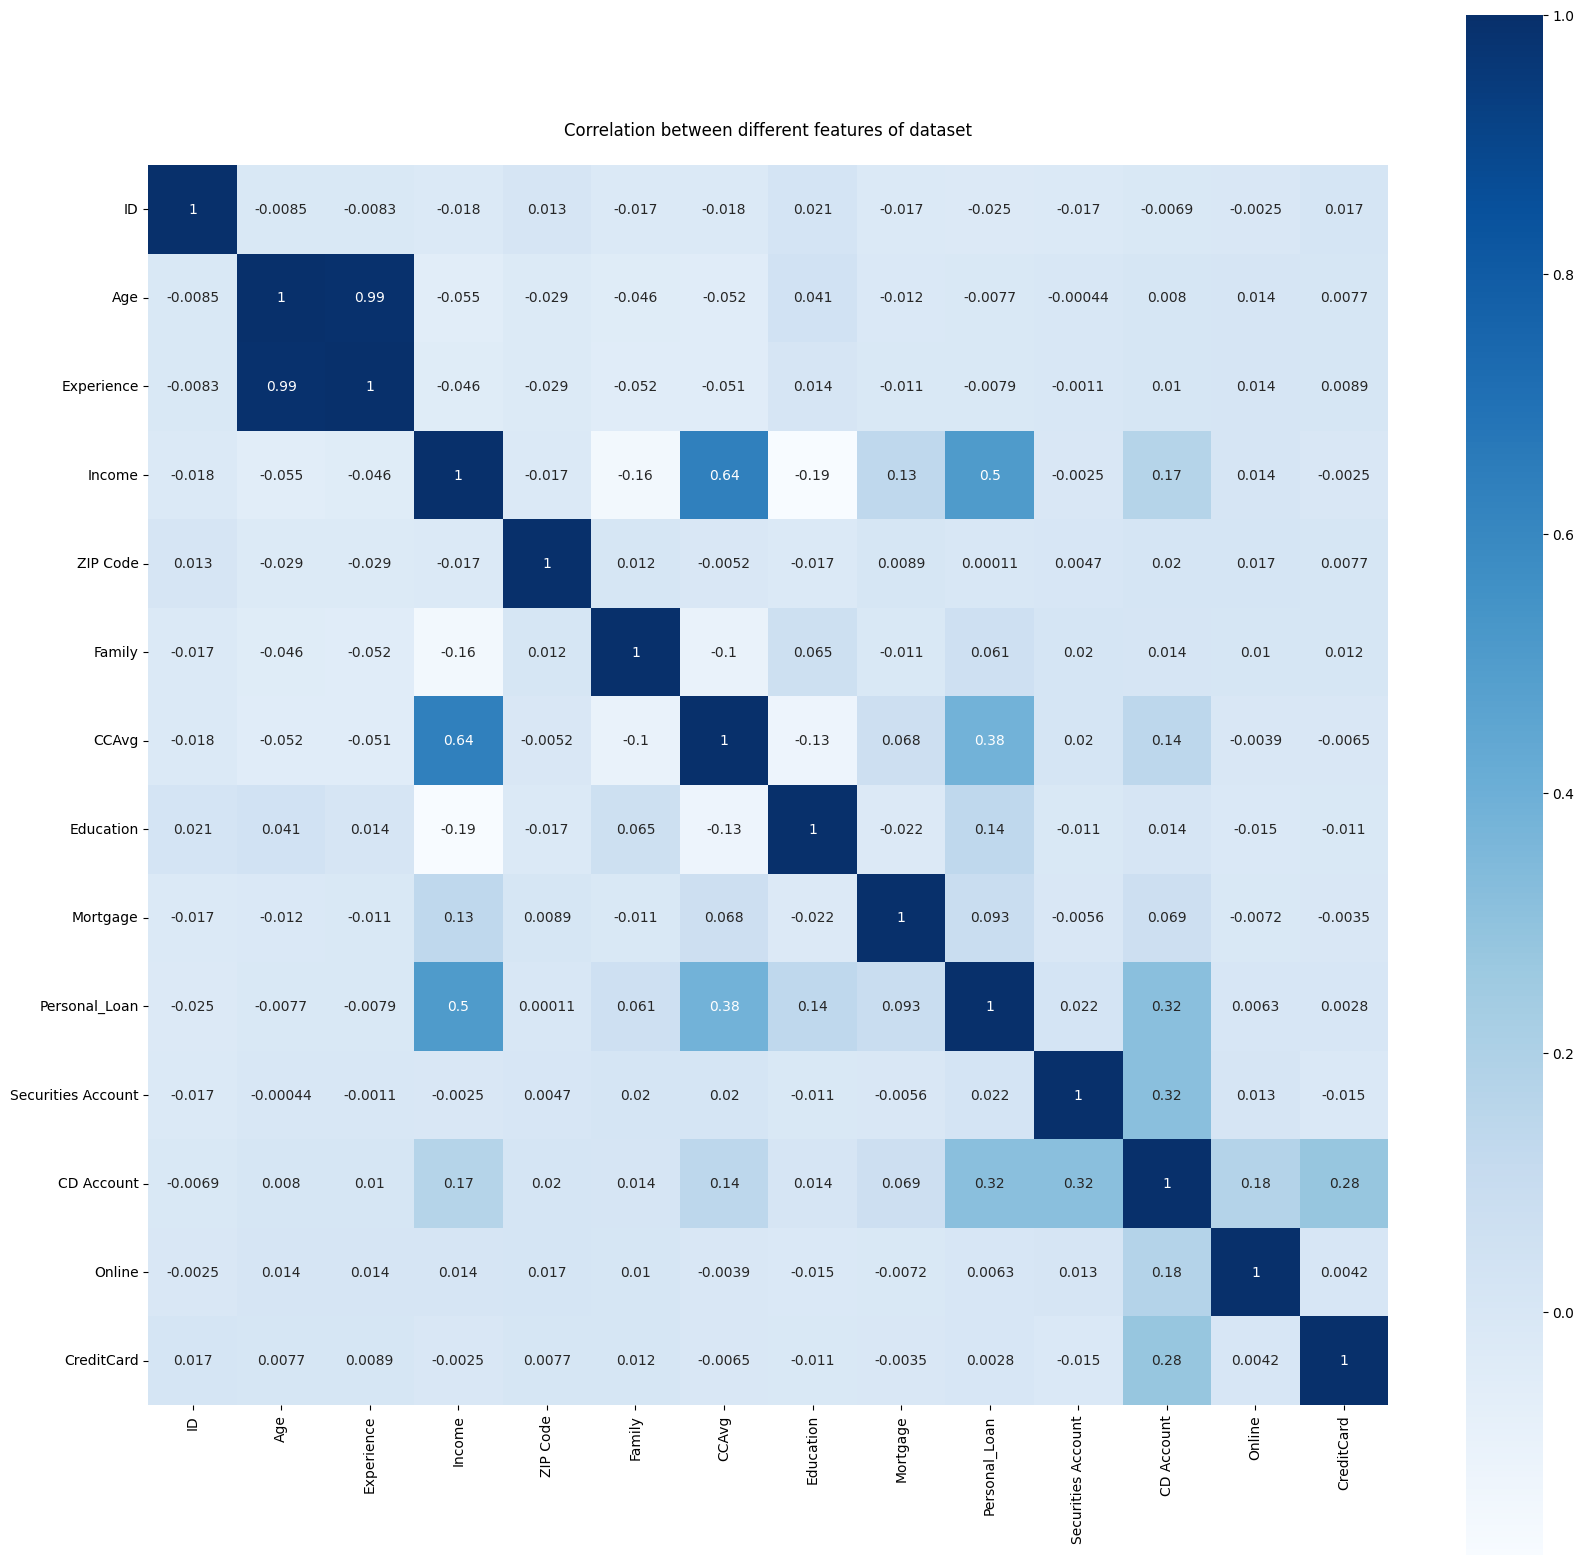

In [50]:
#Correlation matrix
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation between different features of dataset\n')

##### Observation:
1. **Age** and **Experience** have very strong positive correlation of 0.99 (In order to avoid the impact of mult-collinearity, you can use either 'Age' or 'Experience' variable in Logistic regression model as both are highly correlated).
2. **Income** and **CCAvg** have strong positive correlation of 0.64
3. **Income** and **Personal Loan** have positive correlation of 0.50
4. **CCAvg** and **Personal Loan** have positive correlation of 0.38

## 4. Feature Engineering

In [51]:
# Feature Engineering

## 1. Age Group
# Create age group categories to identify patterns based on age ranges
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

## 2. Experience to Age Ratio
# Experience to age ratio can help understand if they are relatively new to the workforce or experienced
df['experience_age_ratio'] = df['Experience'] / df['Age']

## 3. High Income Indicator
# Mark users with income above a certain threshold as high-income
income_threshold = 50
df['high_income'] = (df['Income'] > income_threshold).astype(int)

## 4. Family Size Indicator
# Create a feature indicating if family size is large (3 or more members)
df['large_family'] = (df['Family'] >= 3).astype(int)

## 5. Spending Intensity (CCAvg relative to income)
# Indicates how much a user typically spends relative to their income
df['spending_intensity'] = df['CCAvg'] / df['Income']

## 6. Education Level Binary
# Convert education level to binary for higher education (assuming 2 or above is higher)
df['higher_education'] = (df['Education'] >= 2).astype(int)

## 7. Financial Product Ownership Count
# Count of various accounts a user holds (like securities, CD, online, credit card)
df['financial_products_count'] = (
    df['Securities Account'] + df['CD Account'] + df['Online'] + df['CreditCard']
)

## 8. Mortgage Indicator
# Check if a user has a mortgage or not
df['has_mortgage'] = (df['Mortgage'] > 0).astype(int)

## 9. Potential Loan Candidate
# Identify customers likely to need a loan based on high spending and high income
df['loan_candidate'] = ((df['high_income'] == 1) & (df['spending_intensity'] > 0.02)).astype(int)

## 10. Wealth Indicator
# Wealth indicator based on income and financial products held
df['wealth_indicator'] = (df['Income'] * df['financial_products_count']) / (df['Age'] + 1)


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  ...  age_group  experience_age_ratio  high_income  \
0              0  ...        <25              0.040000            0   
1              0  ...      35-45              0.422222            0   
2              0  ...      35-45              0.384615            0   
3              0  ...      25-35              0.257143            1   
4              0  ...      25-35              0.228571            0   

   large_family spending_intensity  higher_education  \
0             1           0.032653  

In [53]:
# Display the resulting DataFrame
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,...,age_group,experience_age_ratio,high_income,large_family,spending_intensity,higher_education,financial_products_count,has_mortgage,loan_candidate,wealth_indicator
0,1,25,1,49,91107,4,1.6,1,0,0,...,<25,0.040000,0,1,0.032653,0,1,0,0,1.884615
1,2,45,19,34,90089,3,1.5,1,0,0,...,35-45,0.422222,0,1,0.044118,0,1,0,0,0.739130
2,3,39,15,11,94720,1,1.0,1,0,0,...,35-45,0.384615,0,0,0.090909,0,0,0,0,0.000000
3,4,35,9,100,94112,1,2.7,2,0,0,...,25-35,0.257143,1,0,0.027000,1,0,0,1,0.000000
4,5,35,8,45,91330,4,1.0,2,0,0,...,25-35,0.228571,0,1,0.022222,1,1,0,0,1.250000


/var/folders/nc/7jztwfzd53n629c4bt57cpr80000gn/T/ipykernel_7074/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

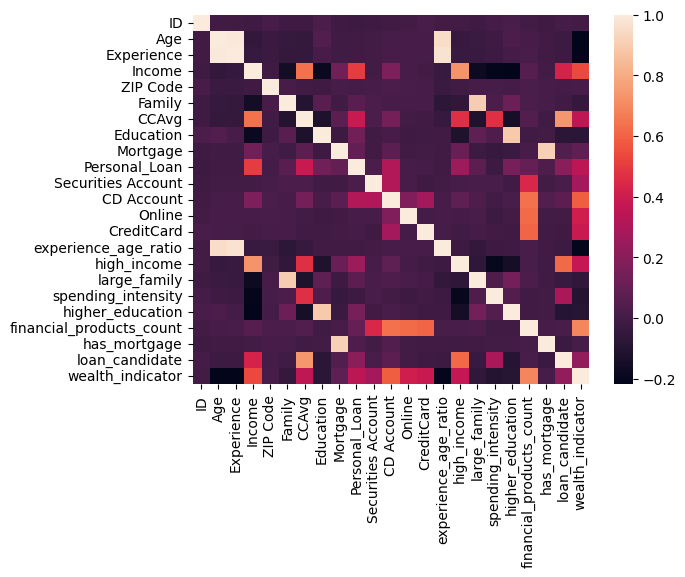

In [74]:
sns.heatmap(df.corr())

## 5. Modeling

In [57]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split
Y = df['Personal_Loan']
X = df.drop(['ID', 'ZIP Code', 'Personal_Loan','age_group'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

In [58]:
from sklearn.feature_selection import SelectPercentile

# 70% of the features/predictors are being selected in the model 
# which are considered as the important predictors of the target variable('Personal Loan')

select = SelectPercentile(percentile=70)
select.fit(X_train, Y_train)
X_train_trans = select.transform(X_train)
X_test_trans = select.transform(X_test)

print('X_train_trans.shape ', X_train_trans.shape)
print('X_train_trans.shape ', X_train_trans.shape)

mask = select.get_support()
print(mask)
print()
print('\nSelected features from the dataset for Logistic Regression model are below:\n')
print(X_train.columns[mask])

X_train_trans.shape  (3500, 14)
X_train_trans.shape  (3500, 14)
[False False  True  True  True  True  True  True  True False False False
  True  True False  True  True  True  True  True]


Selected features from the dataset for Logistic Regression model are below:

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'high_income', 'large_family',
       'higher_education', 'financial_products_count', 'has_mortgage',
       'loan_candidate', 'wealth_indicator'],
      dtype='object')



Logistic Regression model accuracy score =  0.9486666666666667

Test labels, Predicted labels


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

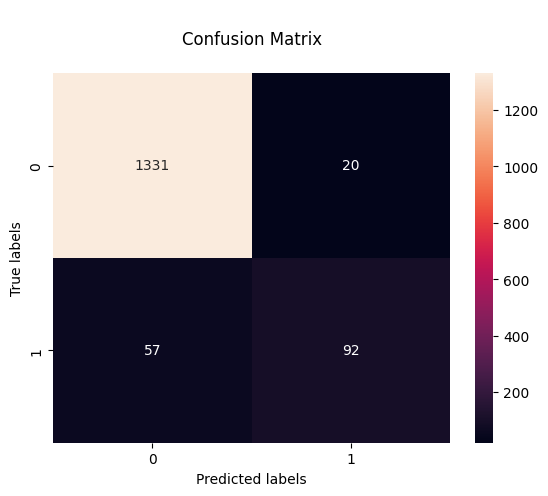

In [59]:
logit_model = LogisticRegression()
logit_model.fit(X_train_trans, Y_train)
accuracy1 = logit_model.score(X_test_trans, Y_test)
Y_predicted1 = logit_model.predict(X_test_trans)
print('\nLogistic Regression model accuracy score = ', accuracy1)
print('\nTest labels, Predicted labels')
y_grid1 = (np.column_stack([Y_test, Y_predicted1]))
#print(y_grid1)

cm = metrics.confusion_matrix(Y_test, Y_predicted1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Gaussian Navie Bayes Model accuracy =  0.8033333333333333

Test labels, Predicted labels
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

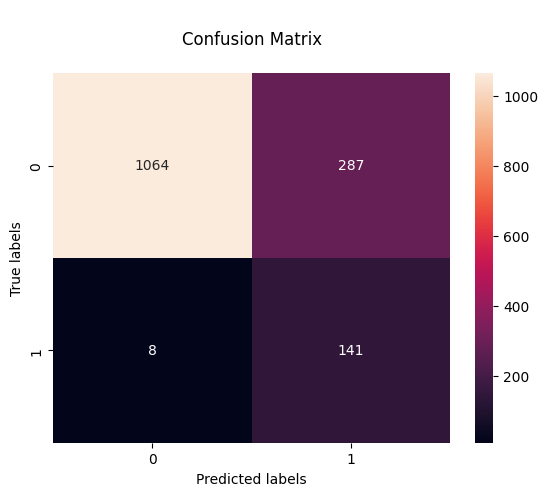

In [60]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)
accuracy2 = gnb_clf.score(X_test, Y_test)
Y_predicted2 = gnb_clf.predict(X_test)
print('\nGaussian Navie Bayes Model accuracy = ', accuracy2)
print('\nTest labels, Predicted labels')
y_grid2 = (np.column_stack([Y_test, Y_predicted2]))
print(y_grid2)

cm = metrics.confusion_matrix(Y_test, Y_predicted2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


KNN Model accuracy =  0.9026666666666666

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 1]
 ...
 [1 0]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

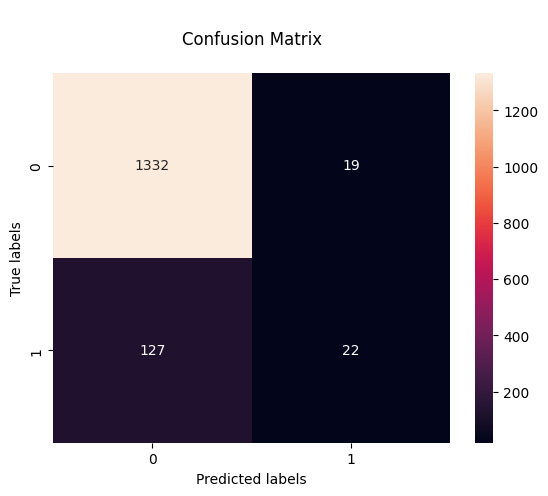

In [61]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy3 = knn_clf.score(X_test, Y_test)
Y_predicted3 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy3)
print('\nTest labels, Predicted labels')
y_grid3 = (np.column_stack([Y_test, Y_predicted3]))
print(y_grid3)


cm = metrics.confusion_matrix(Y_test, Y_predicted3)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the KNN model will be highest when n_neighbors =  15


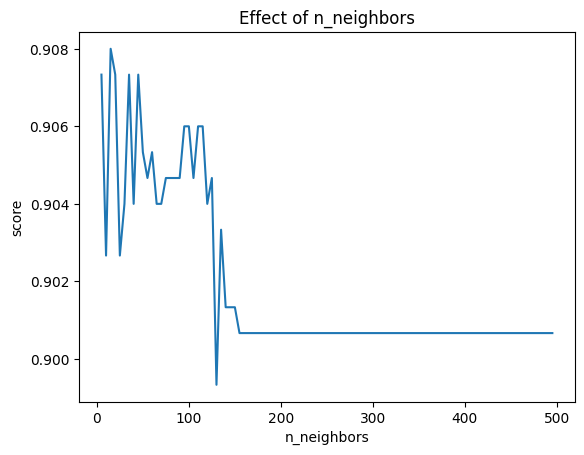

In [62]:
knn_clf = KNeighborsClassifier(n_jobs=-1, metric = 'euclidean')
k_neighbors = np.arange(5, 500, 5)
scores = []

for n in k_neighbors:
    knn_clf.set_params(n_neighbors=n)
    knn_clf.fit(X_train, Y_train)
    scores.append(knn_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the KNN model will be highest when n_neighbors = ', k_neighbors.tolist()[i])       
    i=i+1

plt.title('Effect of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.plot(k_neighbors, scores)
plt.show()


KNN Model accuracy =  0.9073333333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

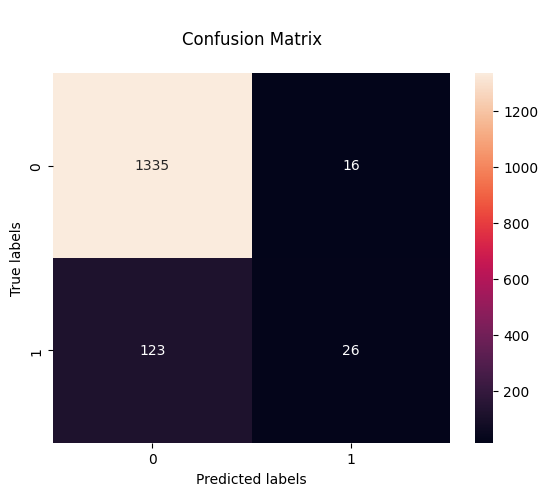

In [63]:
knn_clf = KNeighborsClassifier(n_neighbors = 35, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy4 = knn_clf.score(X_test, Y_test)
Y_predicted4 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy4)
print('\nTest labels, Predicted labels')
y_grid4 = (np.column_stack([Y_test, Y_predicted4]))
print(y_grid4)


cm = metrics.confusion_matrix(Y_test, Y_predicted4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


SVM (Classifier) Model accuracy  =  0.904

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

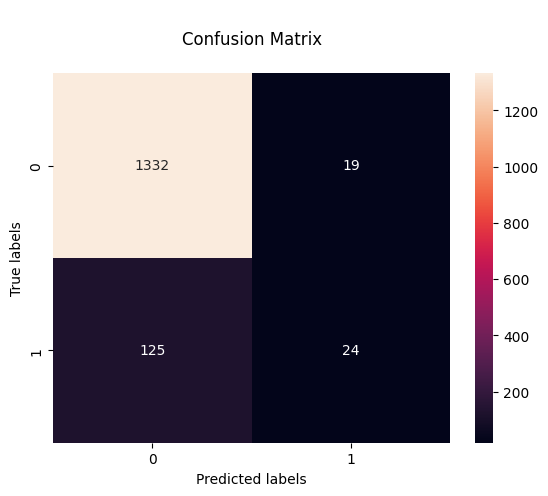

In [64]:
# Support Vector Machine for Classification

from sklearn import metrics
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
accuracy5 = svm_clf.score(X_test, Y_test)
Y_predicted5 = svm_clf.predict(X_test)

print('\nSVM (Classifier) Model accuracy  = ', accuracy5)
print('\nTest labels, Predicted labels')
y_grid5 = (np.column_stack([Y_test, Y_predicted5]))
print(y_grid5)


cm = metrics.confusion_matrix(Y_test, Y_predicted5)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Decision Tree Model accuracy =  0.9766666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

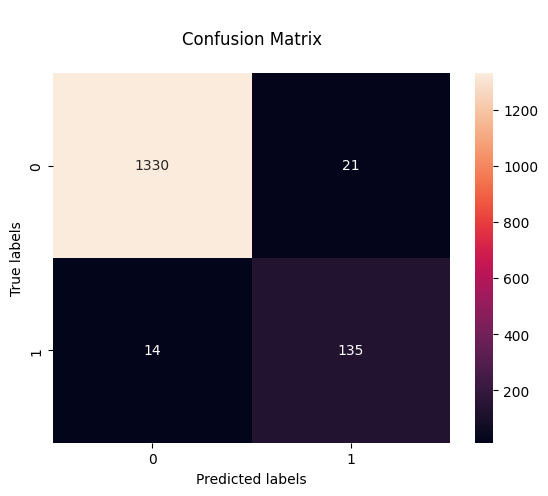

In [65]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, Y_train)
accuracy6 = dt_clf.score(X_test , Y_test)
Y_predicted6 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy6)
print('\nTest labels, Predicted labels')
y_grid6 = (np.column_stack([Y_test, Y_predicted6]))
print(y_grid6)


cm = metrics.confusion_matrix(Y_test, Y_predicted6)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the Decision Tree model will be highest when max_depth =  5


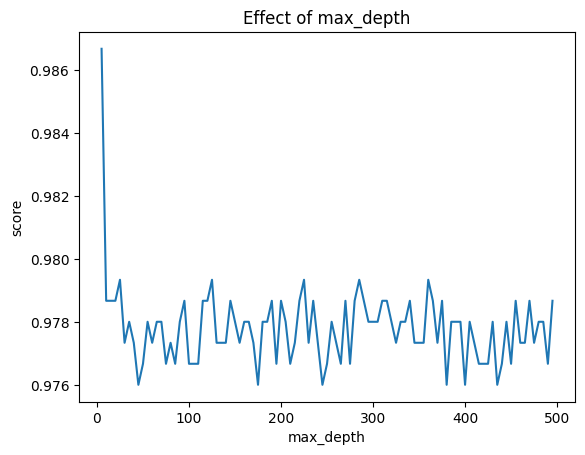

In [66]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
max_depth_est = np.arange(5, 500, 5)
scores = []

for n in max_depth_est:
    dt_clf.set_params(max_depth=n)
    dt_clf.fit(X_train, Y_train)
    scores.append(dt_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Decision Tree model will be highest when max_depth = ', max_depth_est.tolist()[i])
    i=i+1

plt.title('Effect of max_depth')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.plot(max_depth_est, scores)
plt.show()


Decision Tree Model accuracy =  0.9866666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

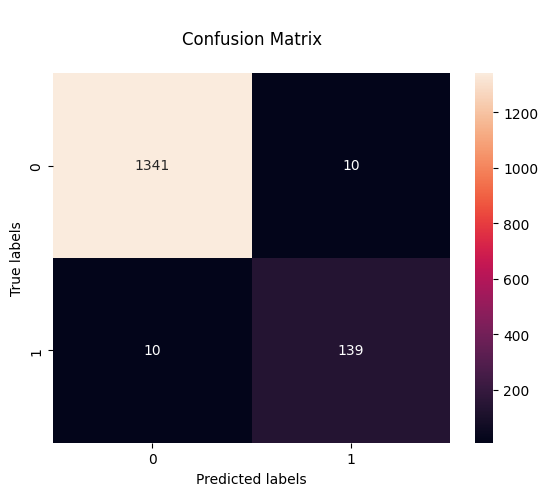

In [67]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_clf.fit(X_train, Y_train)
accuracy7 = dt_clf.score(X_test , Y_test)
Y_predicted7 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy7)
print('\nTest labels, Predicted labels')
y_grid7 = (np.column_stack([Y_test, Y_predicted7]))
print(y_grid7)


cm = metrics.confusion_matrix(Y_test, Y_predicted7)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [69]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
#dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names = list(X_train), class_names = list(Y_labels))
#graph = pydot.graph_from_dot_data(dot_data)  
#Image(graph.create_png())

##### Models Validation: Calculating ROC and AUC values for different models

In [70]:
from sklearn.metrics import roc_curve, auc

# Model Validation for Logistic Regression
# Determine the false positive and true positive rates
fpr1, tpr1, _ = roc_curve(Y_test, logit_model.predict_proba(X_test_trans)[:,1])
roc_auc1 = auc(fpr1, tpr1) # Calculate the AUC
print ('Logistic Regression Model Accuracy: ', accuracy1)
print ('ROC AUC - LogR: ',roc_auc1)

# Model Validation for KNN
# Determine the false positive and true positive rates
fpr3, tpr3, _ = roc_curve(Y_test, knn_clf.predict_proba(X_test)[:,1])
roc_auc3 = auc(fpr3, tpr3) # Calculate the AUC
print ('KNN Model Accuracy (k=35): ', accuracy4)
print ('ROC AUC - kNN: ',roc_auc3)

# Model Validation for Decision Tree
# Determine the false positive and true positive rates
fpr5, tpr5, _ = roc_curve(Y_test, dt_clf.predict_proba(X_test)[:,1])
roc_auc5 = auc(fpr5, tpr5) # Calculate the AUC
print ('Decision Tree Model (Depth-5)  Accuracy: ', accuracy7)
print ('ROC AUC - Decision Tree: ',roc_auc5)

Logistic Regression Model Accuracy:  0.9486666666666667
ROC AUC - LogR:  0.945046920252957
KNN Model Accuracy (k=35):  0.9073333333333333
ROC AUC - kNN:  0.9217358258113553
Decision Tree Model (Depth-5)  Accuracy:  0.9866666666666667
ROC AUC - Decision Tree:  0.9957351998768003


### Ensemble methods
To combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. Two families of ensemble methods are usually distinguished:
1. **Boosting methods** based estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. 
**Ex: AdaBoost**
2. **Averaging(Bagging) methods**: the driving principle is to build several estimators independently and then to average / vote  their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. 
**Ex: Random Forest**

In [71]:
#Boosting Algorithm: AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

dt = DecisionTreeClassifier() 
AdaBoost_clf = AdaBoostClassifier(base_estimator=dt)# decision tree is used as a base estimator
AdaBoost_clf.fit(X_train,Y_train)
accuracy8 = AdaBoost_clf.score(X_test, Y_test)
Y_predicted8 = AdaBoost_clf.predict(X_test)
print('\nAdaBoost Model accuracy = ', accuracy8)
print('\nTest labels, Predicted labels')
y_grid8 = (np.column_stack([Y_test, Y_predicted8]))
print(y_grid8)


cm = metrics.confusion_matrix(Y_test, Y_predicted8)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])    

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [56]:
#Cross-validation of AdaBoost model

kfold = model_selection.KFold(n_splits=10, random_state=7)
AdaBoost_clf = AdaBoostClassifier(random_state=7)
accuracy8 = model_selection.cross_val_score(AdaBoost_clf, X, Y, cv=kfold)
print('\nCross-validation: AdaBoost model accuracy = ', accuracy8.mean())


Cross-validation: AdaBoost model accuracy =  0.9668



Random Forest Model accuracy =  0.983333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

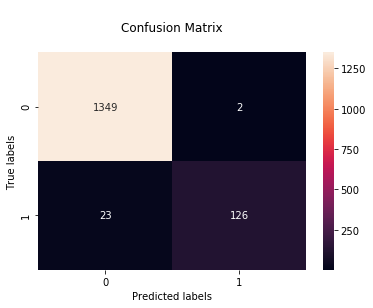

In [62]:
#Bagging Algorithm: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion = 'gini')
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy9 = rf_clf.score(X_test, Y_test)
Y_predicted9 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy9)
print('\nTest labels, Predicted labels')
y_grid9 = (np.column_stack([Y_test, Y_predicted9]))
print(y_grid9)


cm = metrics.confusion_matrix(Y_test, Y_predicted9)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the Random Forest model will be highest when n_estimators(no. of trees) =  60

Score of the Random Forest model will be highest when n_estimators(no. of trees) =  75

Score of the Random Forest model will be highest when n_estimators(no. of trees) =  250

Score of the Random Forest model will be highest when n_estimators(no. of trees) =  310

Score of the Random Forest model will be highest when n_estimators(no. of trees) =  415


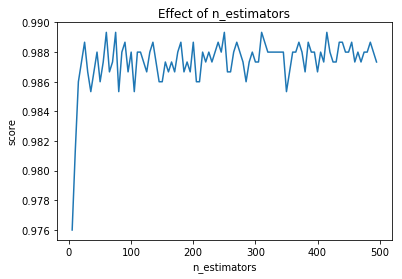

In [63]:
rf_clf = RandomForestClassifier(criterion = 'gini')
estimators = np.arange(5, 500, 5)
scores = []

for n in estimators:
    rf_clf.set_params(n_estimators=n)
    rf_clf.fit(X_train, Y_train)
    scores.append(rf_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Random Forest model will be highest when n_estimators(no. of trees) = ', estimators.tolist()[i])
    i=i+1

plt.title('Effect of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.plot(estimators, scores)
plt.show()


Random Forest Model accuracy =  0.986

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

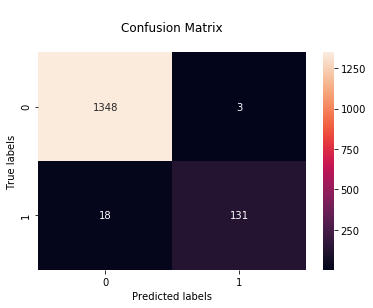

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=60)
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy10 = rf_clf.score(X_test, Y_test)
Y_predicted10 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy10)
print('\nTest labels, Predicted labels')
y_grid10 = (np.column_stack([Y_test, Y_predicted10]))
print(y_grid10)


cm = metrics.confusion_matrix(Y_test, Y_predicted10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

##### Feature Importance from Random Forest Model (this model has the highest accuracy of 98.73%)

In [65]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]

In [66]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf_clf.feature_importances_[indices[f]]]


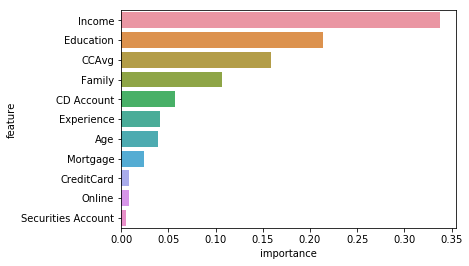

In [67]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

##### Note:

As per the model, the most important features which influence the customer in taking personal loan are listed below:

1. Income
2. Education level
3. CCAvg (Avg. spending on credit cards per month (thousand dollars))
4. Family size
5. CD Account (having certificate of deposit (CD) account or not)
6. Age
7. Mortgage